In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns



import cv2
from pathlib import Path
import os

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
os.listdir("/kaggle/input/image-matching-challenge-2025")

['sample_submission.csv',
 'train_thresholds.csv',
 'train_labels.csv',
 'test',
 'train']

In [4]:
df1 = pd.read_csv("/kaggle/input/image-matching-challenge-2025/train_thresholds.csv")
df2 = pd.read_csv("/kaggle/input/image-matching-challenge-2025/train_labels.csv")

In [5]:
df1.head()

dataset             scene                        thresholds
0   amy_gardens             peach       0.01;0.02;0.05;0.1;0.25;0.5
1           ETs                ET  0.002;0.005;0.008;0.01;0.02;0.04
2           ETs        another_ET  0.002;0.005;0.008;0.01;0.02;0.04
3  fbk_vineyard  vineyard_split_1       0.01;0.02;0.05;0.1;0.25;0.5
4  fbk_vineyard  vineyard_split_2       0.01;0.02;0.05;0.1;0.25;0.5

In [6]:
df2.head()

dataset     scene                   image  \
0  imc2023_haiper  fountain  fountain_image_116.png   
1  imc2023_haiper  fountain  fountain_image_108.png   
2  imc2023_haiper  fountain  fountain_image_101.png   
3  imc2023_haiper  fountain  fountain_image_082.png   
4  imc2023_haiper  fountain  fountain_image_071.png   

                                     rotation_matrix  \
0  0.122655949;0.947713775;-0.294608417;0.1226706...   
1  0.474305910;0.359108654;-0.803787832;0.2888416...   
2  0.565115476;-0.138485064;-0.813305838;0.506678...   
3  -0.308320392;-0.794654112;0.522937261;0.948141...   
4  -0.569002830;-0.103808175;0.815757098;0.778745...   

                      translation_vector  
0   0.093771314;-0.803560988;2.062001533  
1   0.358946647;-0.797557548;1.910906929  
2   0.146922468;-0.981392596;2.009002852  
3   0.206413831;-1.174321103;3.667167680  
4  -0.015140892;-1.334052012;3.488936597

In [7]:
l2 = df2['dataset'].value_counts()
df2['dataset'].value_counts()

dataset
pt_brandenburg_british_buckingham    225
pt_sacrecoeur_trevi_tajmahal         225
imc2024_lizard_pond                  214
imc2023_heritage                     209
pt_stpeters_stpauls                  200
amy_gardens                          200
pt_piazzasanmarco_grandplace         168
fbk_vineyard                         163
imc2024_dioscuri_baalshamin          138
imc2023_theather_imc2024_church       76
imc2023_haiper                        54
stairs                                51
ETs                                   22
Name: count, dtype: int64

In [8]:
l1 = df1['dataset'].value_counts()
df1['dataset'].value_counts()

dataset
fbk_vineyard                         3
imc2023_haiper                       3
imc2023_heritage                     3
pt_brandenburg_british_buckingham    3
pt_sacrecoeur_trevi_tajmahal         3
ETs                                  2
stairs                               2
imc2023_theather_imc2024_church      2
imc2024_dioscuri_baalshamin          2
imc2024_lizard_pond                  2
pt_piazzasanmarco_grandplace         2
pt_stpeters_stpauls                  2
amy_gardens                          1
Name: count, dtype: int64

In [9]:
len(l1), len(l2)

(13, 13)

In [10]:
df1[df1['dataset']=="imc2023_haiper"]

dataset     scene                thresholds
8   imc2023_haiper      bike  0;0;0.001;0.025;0.05;0.1
9   imc2023_haiper    chairs  0;0;0.001;0.025;0.05;0.1
10  imc2023_haiper  fountain  0;0;0.001;0.025;0.05;0.1

# Calcualte the number of images in the train/ETs,stairs,..... and match them with df2

In [11]:
train_path = '/kaggle/input/image-matching-challenge-2025/train'  # Adjust if the folder name is different
image_counts = {}

for scene_folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, scene_folder)
    if os.path.isdir(folder_path):
        num_images = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png', '.jpeg'))])
        image_counts[scene_folder] = num_images

# Optional: sort by number of images
image_counts = dict(sorted(image_counts.items(), key=lambda x: x[1], reverse=True))

# Display top 5 as preview
for k, v in list(image_counts.items())[:5]:
    print(f"{k}: {v} images")


pt_brandenburg_british_buckingham: 225 images
pt_sacrecoeur_trevi_tajmahal: 225 images
imc2024_lizard_pond: 214 images
imc2023_heritage: 209 images
amy_gardens: 200 images


In [12]:
train_path = '/kaggle/input/image-matching-challenge-2025/train' 

images_count = {}

for scene_folder in os.listdir(train_path):
    # print(scene_folder)
    folder_path = os.path.join(train_path, scene_folder)
    if os.path.isdir(folder_path):
        
        images_count[scene_folder] = len([img for img in os.listdir(folder_path) if img.endswith(('.jpg', '.png', '.jpeg'))])


In [13]:
df = pd.DataFrame(list(images_count.items()), columns=['Folder', 'Image_Count'])
sorted(df["Image_Count"], reverse = True)

[225, 225, 214, 209, 200, 200, 168, 163, 138, 76, 54, 51, 22]

In [14]:
df2['dataset'].value_counts()

dataset
pt_brandenburg_british_buckingham    225
pt_sacrecoeur_trevi_tajmahal         225
imc2024_lizard_pond                  214
imc2023_heritage                     209
pt_stpeters_stpauls                  200
amy_gardens                          200
pt_piazzasanmarco_grandplace         168
fbk_vineyard                         163
imc2024_dioscuri_baalshamin          138
imc2023_theather_imc2024_church       76
imc2023_haiper                        54
stairs                                51
ETs                                   22
Name: count, dtype: int64

## Yes the number of images and their ground truth matches

# Undersatnding so far:
1. Scenes are images fodlers only, ETS, etc etc
2. Train labels are ground truths

# BASELINE

### 1. Feature Extraction

In [15]:
train_path = str(train_path)
images_path = {}

# Visualizing teh images

training_path = Path(train_path)
for folder in training_path.iterdir():
    if folder.is_dir():
        png_files = list(folder.glob('*.png'))
        if png_files:
            images_path[folder.name] = str(png_files[0])
            # images_path.append(png_files[0])  # take the first image

In [16]:
images_path

{'amy_gardens': '/kaggle/input/image-matching-challenge-2025/train/amy_gardens/peach_0044.png',
 'ETs': '/kaggle/input/image-matching-challenge-2025/train/ETs/another_et_another_et004.png',
 'pt_brandenburg_british_buckingham': '/kaggle/input/image-matching-challenge-2025/train/pt_brandenburg_british_buckingham/brandenburg_gate_69037173_2735815523.png',
 'fbk_vineyard': '/kaggle/input/image-matching-challenge-2025/train/fbk_vineyard/vineyard_split_3_frame_0260.png',
 'pt_stpeters_stpauls': '/kaggle/input/image-matching-challenge-2025/train/pt_stpeters_stpauls/st_pauls_cathedral_04913236_119772663.png',
 'pt_piazzasanmarco_grandplace': '/kaggle/input/image-matching-challenge-2025/train/pt_piazzasanmarco_grandplace/grand_place_brussels_97679107_216044726.png',
 'imc2023_heritage': '/kaggle/input/image-matching-challenge-2025/train/imc2023_heritage/outliers_img_3261.png',
 'imc2024_dioscuri_baalshamin': '/kaggle/input/image-matching-challenge-2025/train/imc2024_dioscuri_baalshamin/dioscur

In [17]:
def draw(folder, path):
    # Load image in color and grayscale
    img_color = cv2.imread(str(path))  # BGR format
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    # Show shape
    print("Image bgr Shape:", img_color.shape)
    print("Image gray shape: ", img_gray.shape)
    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
    print("Image rgb shape: ", img_rgb.shape)
    
    # Display both
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.title(f"BGR Image of {folder}")
    plt.imshow(img_rgb)
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.title(f"Grayscale Image of {folder}")
    plt.imshow(img_gray, cmap='gray')
    plt.axis("off")
    
    plt.subplot(1,3,3)
    plt.title(f"RGB Image of {folder}")
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

Image bgr Shape: (1024, 576, 3)
Image gray shape:  (1024, 576)
Image rgb shape:  (1024, 576, 3)


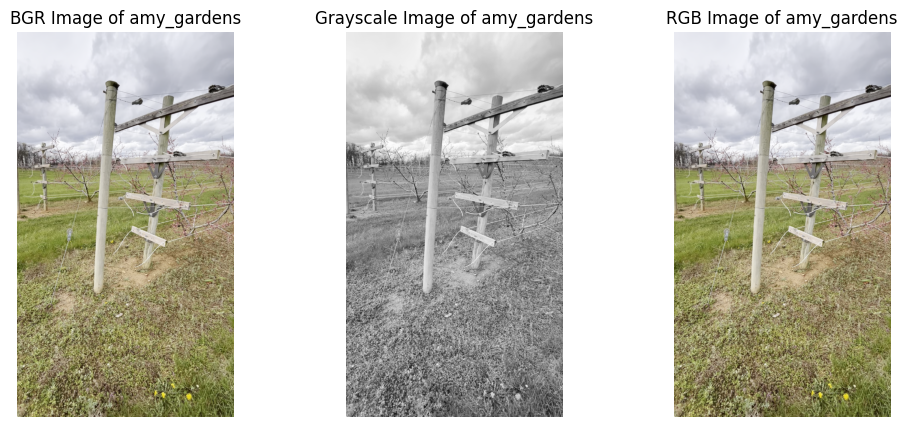

Image bgr Shape: (640, 360, 3)
Image gray shape:  (640, 360)
Image rgb shape:  (640, 360, 3)


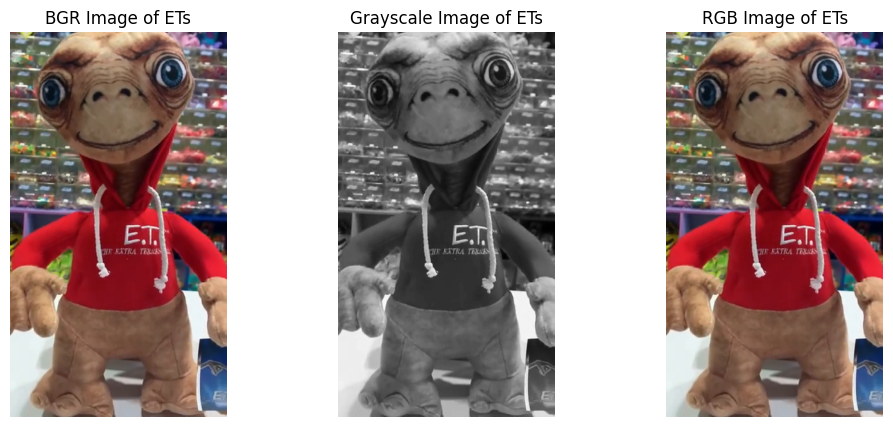

Image bgr Shape: (654, 1020, 3)
Image gray shape:  (654, 1020)
Image rgb shape:  (654, 1020, 3)


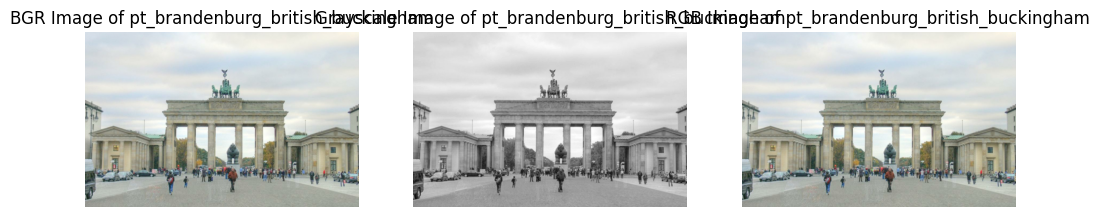

Image bgr Shape: (640, 360, 3)
Image gray shape:  (640, 360)
Image rgb shape:  (640, 360, 3)


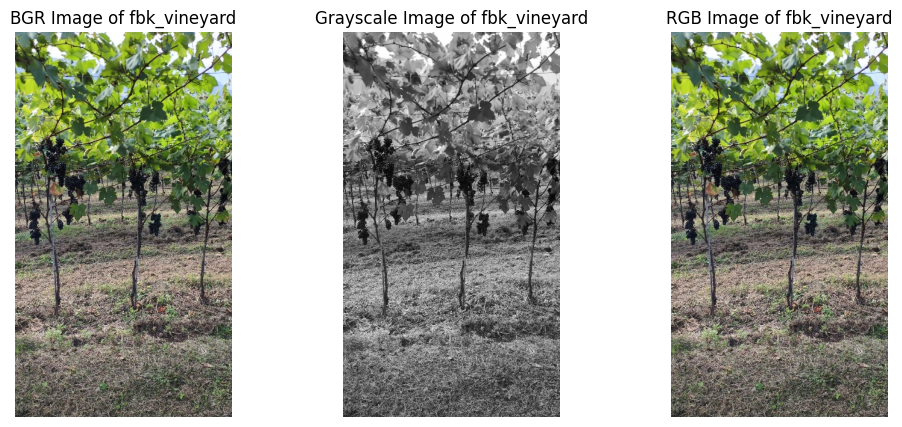

Image bgr Shape: (664, 492, 3)
Image gray shape:  (664, 492)
Image rgb shape:  (664, 492, 3)


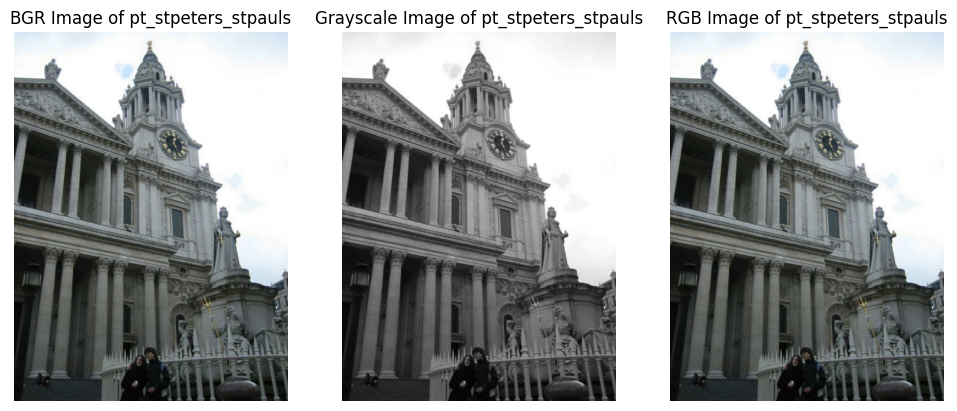

Image bgr Shape: (769, 1028, 3)
Image gray shape:  (769, 1028)
Image rgb shape:  (769, 1028, 3)


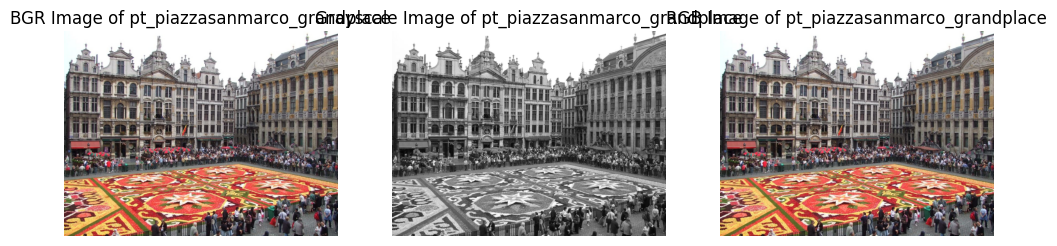

Image bgr Shape: (683, 1024, 3)
Image gray shape:  (683, 1024)
Image rgb shape:  (683, 1024, 3)


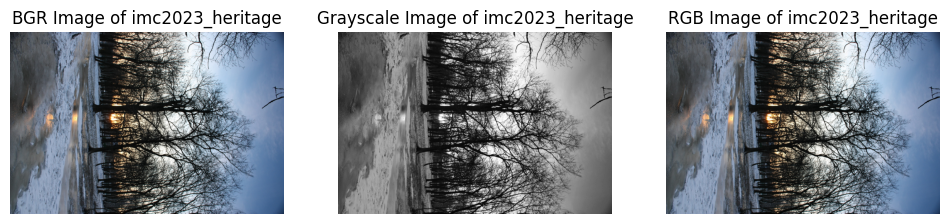

Image bgr Shape: (768, 1024, 3)
Image gray shape:  (768, 1024)
Image rgb shape:  (768, 1024, 3)


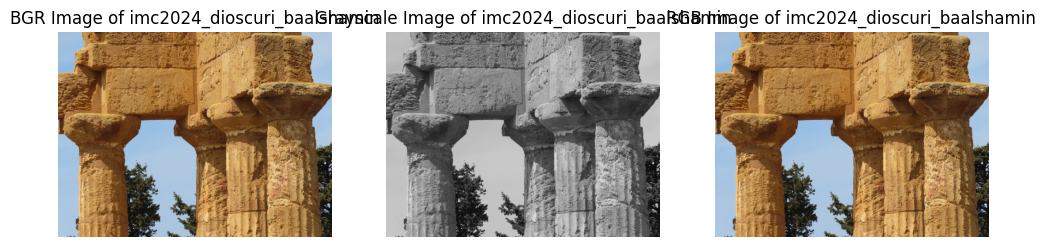

Image bgr Shape: (780, 1057, 3)
Image gray shape:  (780, 1057)
Image rgb shape:  (780, 1057, 3)


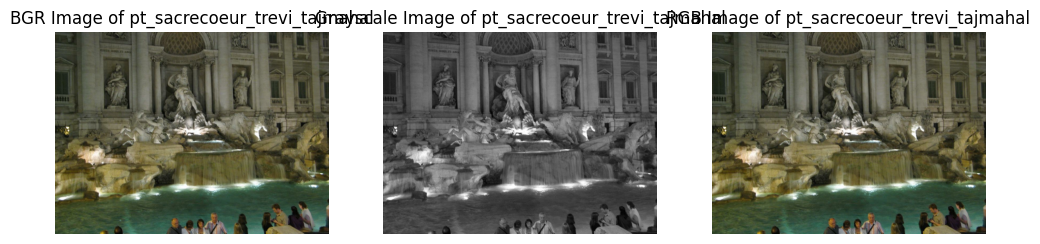

Image bgr Shape: (1024, 768, 3)
Image gray shape:  (1024, 768)
Image rgb shape:  (1024, 768, 3)


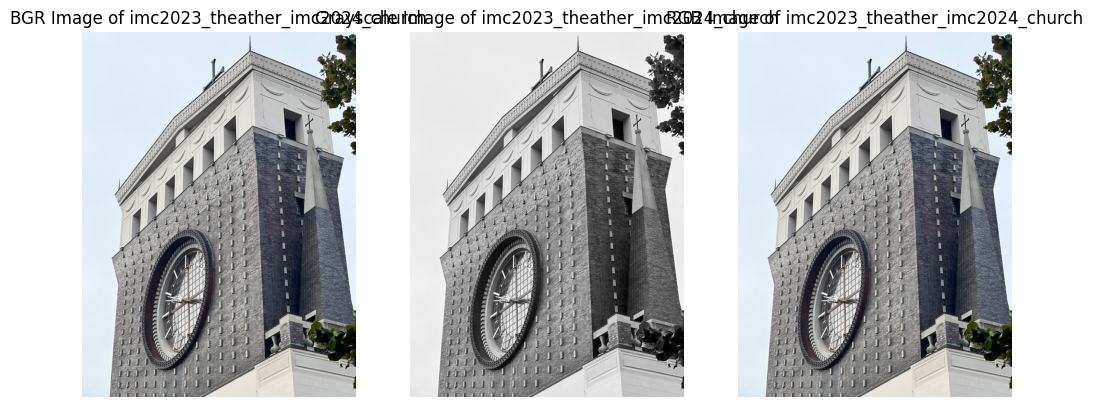

Image bgr Shape: (1024, 576, 3)
Image gray shape:  (1024, 576)
Image rgb shape:  (1024, 576, 3)


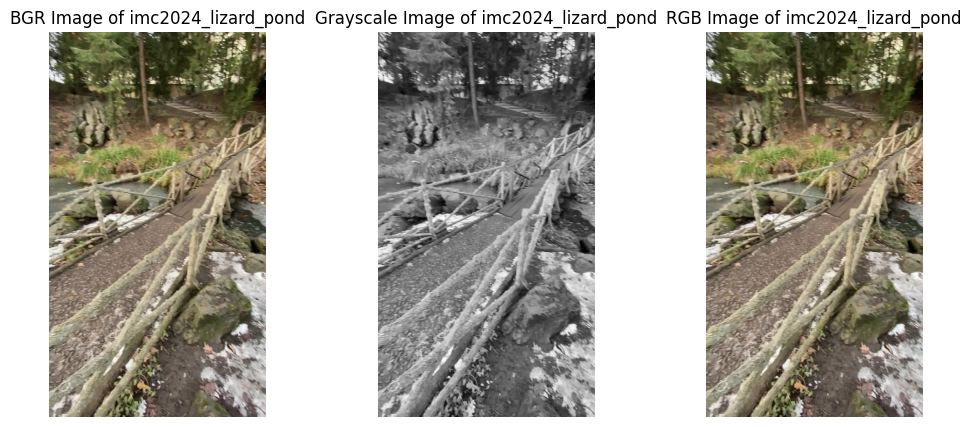

Image bgr Shape: (1920, 1440, 3)
Image gray shape:  (1920, 1440)
Image rgb shape:  (1920, 1440, 3)


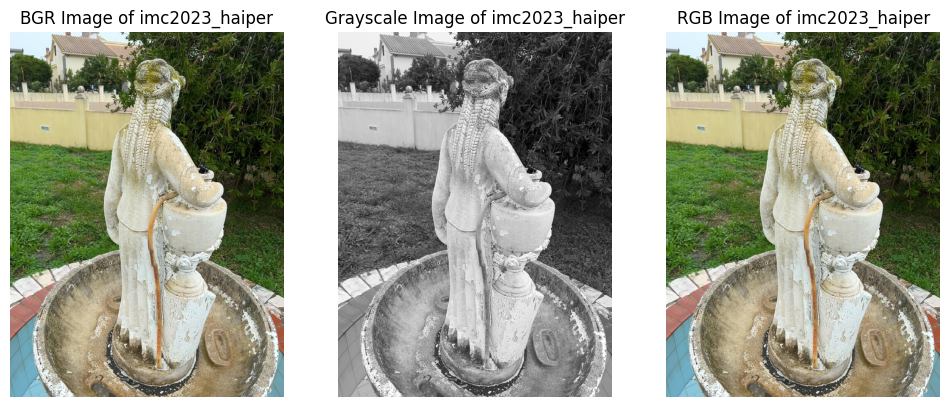

Image bgr Shape: (1024, 1280, 3)
Image gray shape:  (1024, 1280)
Image rgb shape:  (1024, 1280, 3)


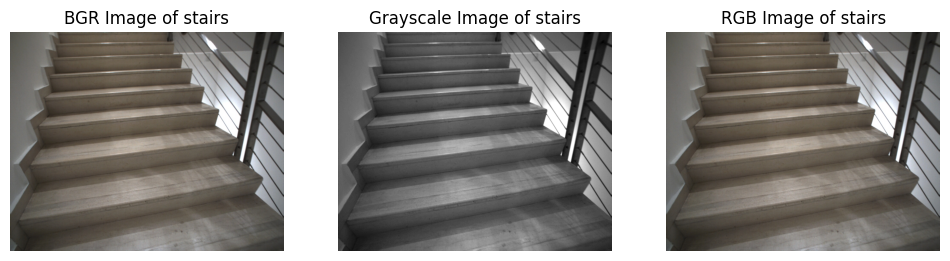

In [18]:
for key, value in images_path.items():
    draw(key, value)

# To do:_> Check the size of first imaegs in each scene. They must be same for each folder. Then go for SIFT

### 2. Feature Mapping

### 3. Pair Selection

### 4. Geometric Verification

### 5. Build 3-D scene

### 6. Get the output

# 